In [47]:
# Buen trabajo
#5
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# leemos los datos y lo converitmos a DataFrame
data = pd.read_csv('auto.csv')
data = pd.DataFrame(data)

In [66]:
data.head()

Unnamed: 0  symboling  normalized-losses         make aspiration  \
0           0          3                122  alfa-romero        std   
1           1          3                122  alfa-romero        std   
2           2          1                122  alfa-romero        std   
3           3          2                164         audi        std   
4           4          2                164         audi        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   compression-ratio  horsepower  peak-rpm  city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0        21          27  13495.0   
1                9.0       111.0    5000.0        21          27  16500.0   
2                9.0       154.0    5000.0        19          26  16500.0   
3               10.0       102.0    5500.0        24          30  13950.0   
4                8.0       115.0    5500.0        18          22  17450.0   

   city-L/100km horsepower-binned  diesel  gas  
0     11.190476            Medium       0    1  
1     11.190476            Medium       0    1  
2     12.368421            Medium       0    1  
3      9.791667            Medium       0    1  
4     13.055556            Medium       0    1  

[5 rows x 30 columns]

En primer lugar queremos ver la relación general que existe entre precio y horsepower (HP) para todas las marcas y autos listados en el dataFrame. 

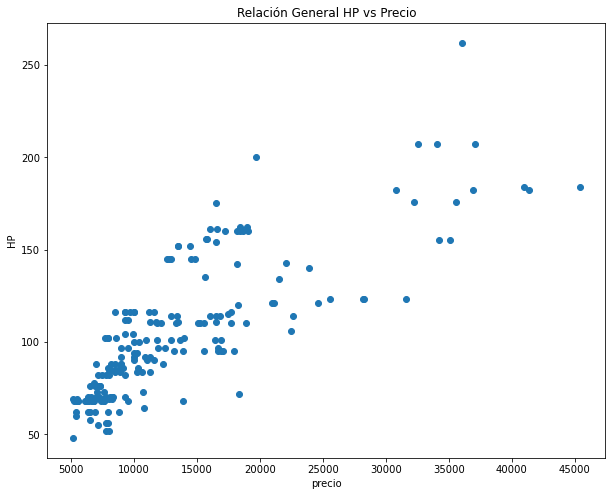

In [92]:
plt.figure(figsize=(10, 8))
plt.title('Relación General HP vs Precio')
plt.scatter(data['price'], data['horsepower'])
plt.xlabel('precio')
plt.ylabel('HP')
plt.show()

Ahora miremos una marca en particular, por ejemplo, volovo. Similarmente queremos ver la relación entre caballos de fuerza y precio para los modelos ofrecidos.

In [119]:
v = data.loc[data['make'] == 'volvo']
v

Unnamed: 0  symboling  normalized-losses   make aspiration num-of-doors  \
190         190         -2                103  volvo        std         four   
191         191         -1                 74  volvo        std         four   
192         192         -2                103  volvo        std         four   
193         193         -1                 74  volvo        std         four   
194         194         -2                103  volvo      turbo         four   
195         195         -1                 74  volvo      turbo         four   
196         196         -1                 95  volvo        std         four   
197         197         -1                 95  volvo      turbo         four   
198         198         -1                 95  volvo        std         four   
199         199         -1                 95  volvo      turbo         four   
200         200         -1                 95  volvo      turbo         four   

    body-style drive-wheels engine-location  wheel-base  ...  \
190      sedan          rwd           front       104.3  ...   
191      wagon          rwd           front       104.3  ...   
192      sedan          rwd           front       104.3  ...   
193      wagon          rwd           front       104.3  ...   
194      sedan          rwd           front       104.3  ...   
195      wagon          rwd           front       104.3  ...   
196      sedan          rwd           front       109.1  ...   
197      sedan          rwd           front       109.1  ...   
198      sedan          rwd           front       109.1  ...   
199      sedan          rwd           front       109.1  ...   
200      sedan          rwd           front       109.1  ...   

     compression-ratio  horsepower  peak-rpm  city-mpg highway-mpg    price  \
190                9.5       114.0    5400.0        23          28  12940.0   
191                9.5       114.0    5400.0        23          28  13415.0   
192                9.5       114.0    5400.0        24          28  15985.0   
193                9.5       114.0    5400.0        24          28  16515.0   
194                7.5       162.0    5100.0        17          22  18420.0   
195                7.5       162.0    5100.0        17          22  18950.0   
196                9.5       114.0    5400.0        23          28  16845.0   
197                8.7       160.0    5300.0        19          25  19045.0   
198                8.8       134.0    5500.0        18          23  21485.0   
199               23.0       106.0    4800.0        26          27  22470.0   
200                9.5       114.0    5400.0        19          25  22625.0   

     city-L/100km horsepower-binned  diesel  gas  
190     10.217391            Medium       0    1  
191     10.217391            Medium       0    1  
192      9.791667            Medium       0    1  
193      9.791667            Medium       0    1  
194     13.823529              High       0    1  
195     13.823529              High       0    1  
196     10.217391            Medium       0    1  
197     12.368421              High       0    1  
198     13.055556            Medium       0    1  
199      9.038462            Medium       1    0  
200     12.368421            Medium       0    1  

[11 rows x 30 columns]

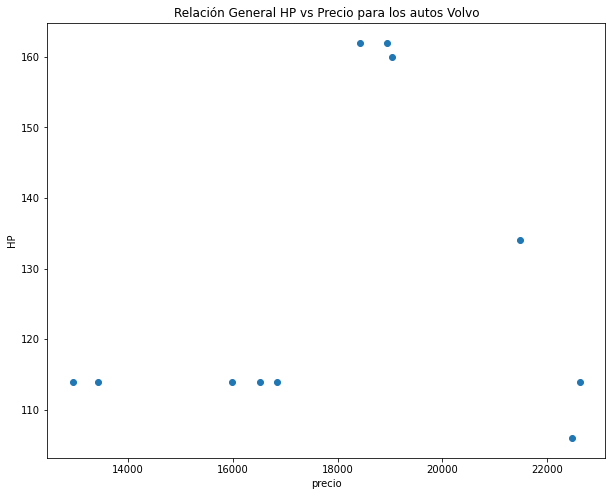

In [118]:
plt.figure(figsize=(10, 8))
plt.title('Relación General HP vs Precio para los autos Volvo')
plt.scatter(v['price'], v['horsepower'])
plt.xlabel('precio')
plt.ylabel('HP')
plt.show()

Vemos que tanto para la gráfica general como para el caso de volvo en particular, no existe una relación directa entre el precio  y los caballos de fuerza. Un carro de precio 18000 tiene más caballos de fuerza que uno de 22000.

- Ahora supongamos que queremos analizar los datos para las marcas volvo y audi, para esto hacemos un merge de los data frames correspondientes

In [130]:
# dataFrame que contiene la información de la marca audi 
a = data.loc[data['make'] == 'audi']
# outer merge
audi_volovo = pd.merge(v, a, how='outer')

Queremos ver como es el rendimiento de combustible en la ciudad (mpg: millas por galón) para los datos juntos de audi & volvo.

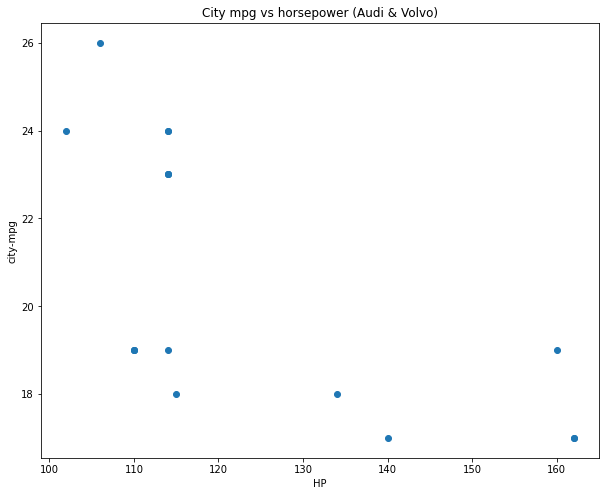

In [149]:
plt.figure(figsize=(10, 8))
plt.title('City mpg vs horsepower (Audi & Volvo)')
plt.plot(audi_volovo['horsepower'], audi_volovo['city-mpg'], 'o')
plt.xlabel('HP')
plt.ylabel('city-mpg')
plt.show()

No se aprecia un comportamiento bien definidio, sin embargo si hay una tendencia a que los carros con más caballos de fuerza (motores más potentes y casi siempre más grandes) tengan un menor rendimiento de combustible. 

## Informe

Supongamos que alguien está interesado en comprar un auto de las marcas listadas en el DataFrame. Una forma rápida de filtrar cuales marcas serían una posible opción de acuerdo a un presupuesto fijo es revisar el precio promedio de los autos por marca. Este es uno de los factores más importantes a la hora de pensar en comprar un auto pues el consumidor debe saber cuales son sus opciones. 

In [87]:
mean_price = data.groupby('make').price.mean()

# y organizamos de menor a mayor precio
mean_price.sort_values()

make
chevrolet         6007.000000
dodge             7875.444444
plymouth          7963.428571
honda             8184.692308
subaru            8541.250000
isuzu             8916.500000
mitsubishi        9239.769231
renault           9595.000000
toyota            9885.812500
volkswagen       10077.500000
nissan           10415.666667
mazda            10652.882353
saab             15223.333333
peugot           15489.090909
alfa-romero      15498.333333
mercury          16503.000000
audi             17859.166667
volvo            18063.181818
bmw              26118.750000
porsche          31400.500000
mercedes-benz    33647.000000
jaguar           34600.000000
Name: price, dtype: float64

Vemos entonces que acorde a los precios promedios, la marca más accesible serie chevrolet, y la más costosa sería jaguar. 

otro factor de gran importancia a la hora de comprar un auto es la relación precio - rendimiento de combuestible en ciudad (pues en la ciudad es donde circulan el gran porcentaje de los automoviles)

In [180]:
gas = data.groupby('price').min()
gas

Unnamed: 0  symboling  normalized-losses           make aspiration  \
price                                                                         
5118.0          134          2                 83         subaru        std   
5151.0           17          2                121      chevrolet        std   
5195.0           47          1                104          mazda        std   
5348.0          146          1                 87         toyota        std   
5389.0           73          2                161     mitsubishi        std   
...             ...        ...                ...            ...        ...   
36880.0          16          0                122            bmw        std   
37028.0         125          3                122        porsche        std   
40960.0          70          0                122  mercedes-benz        std   
41315.0          15          0                122            bmw        std   
45400.0          71          1                122  mercedes-benz        std   

        num-of-doors   body-style drive-wheels engine-location  wheel-base  \
price                                                                        
5118.0           two    hatchback          fwd           front        93.7   
5151.0           two    hatchback          fwd           front        88.4   
5195.0           two    hatchback          fwd           front        93.1   
5348.0           two    hatchback          fwd           front        95.7   
5389.0           two    hatchback          fwd           front        93.7   
...              ...          ...          ...             ...         ...   
36880.0         four        sedan          rwd           front       110.0   
37028.0          two  convertible          rwd            rear        89.5   
40960.0         four        sedan          rwd           front       120.9   
41315.0          two        sedan          rwd           front       103.5   
45400.0          two      hardtop          rwd           front       112.0   

         ...  stroke  compression-ratio  horsepower  peak-rpm city-mpg  \
price    ...                                                             
5118.0   ...    2.36                9.0        69.0    4900.0       31   
5151.0   ...    3.03                9.5        48.0    5100.0       47   
5195.0   ...    3.15                9.0        68.0    5000.0       30   
5348.0   ...    3.03                9.0        62.0    4800.0       35   
5389.0   ...    3.23                9.4        68.0    5500.0       37   
...      ...     ...                ...         ...       ...      ...   
36880.0  ...    3.39                8.0       182.0    5400.0       15   
37028.0  ...    2.90                9.5       207.0    5900.0       17   
40960.0  ...    3.35                8.0       184.0    4500.0       14   
41315.0  ...    3.39                8.0       182.0    5400.0       16   
45400.0  ...    3.35                8.0       184.0    4500.0       14   

        highway-mpg  city-L/100km horsepower-binned  diesel  gas  
price                                                             
5118.0           36      7.580645               Low       0    1  
5151.0           53      5.000000               Low       0    1  
5195.0           31      7.833333               Low       0    1  
5348.0           39      6.714286               Low       0    1  
5389.0           41      6.351351               Low       0    1  
...             ...           ...               ...     ...  ...  
36880.0          20     15.666667              High       0    1  
37028.0          25     13.823529              High       0    1  
40960.0          16     16.785714              High       0    1  
41315.0          22     14.687500              High       0    1  
45400.0          16     16.785714              High       0    1  

[186 rows x 29 columns]

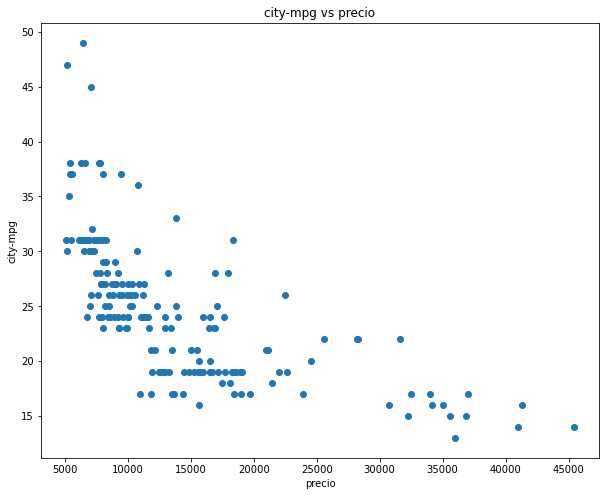

In [174]:
plt.figure(figsize=(10, 8))
plt.title('city-mpg vs precio')
plt.plot(gas['city-mpg'], 'o')
plt.xlabel('precio')
plt.ylabel('city-mpg')
plt.show()

En general se aprecia que los carros más económicos son los que tienen un mayor rendimiento de combustible en la ciudad. Esto se puede deber principalmente a que los autos más caros presentan mayor potencia y el rendimiento de combustuble es menor. Además que en los autos de gama alta los fabricantes normalmente no priorizan el rendimiento sino la potencia, los acabados y el lujo de los carros. 